In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2017-08-23
2016-08-23


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-18'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-16'),
  Text(1000.0, 0, '2017-02-13'),
  Text(1500.0, 0, '2017-05-14'),
  Text(2000.0, 0, '2017-08-17'),
  Text(2500.0, 0, '')])

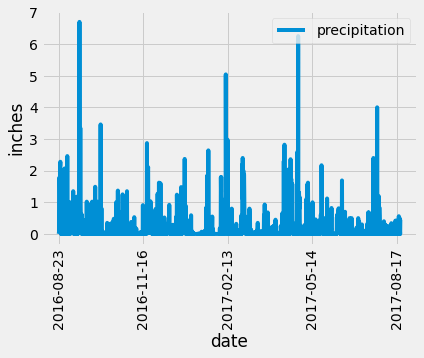

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent=dt.date(2017,8,23)
print(most_recent)
# Calculate the date one year from the last date in data set.
prev_year=dt.date(2017,8,23)-dt.timedelta(days=365)
print(prev_year)

# Perform a query to retrieve the data and precipitation scores
results=[]
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df=pd.DataFrame(results, columns=["date", "precipitation"])
results_df=results_df.dropna(how="any")
results_df=results_df.set_index("date")
#results_df
# Sort the dataframe by date
results_df=results_df.sort_index()
results_df
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()
plt.legend(loc='upper right')
plt.ylabel('inches')
plt.xticks(rotation = 90)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=session.query(Measurement.station).group_by(Measurement.station).\
                          order_by(func.count(Measurement.date).desc()).first()
print(most_active)

most_active_stats=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                               func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(most_active_stats)

('USC00519281',)
[(54.0, 85.0, 71.66378066378067)]


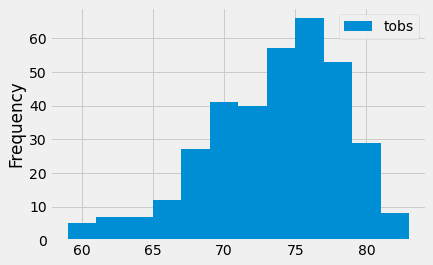

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
                                .filter(Measurement.date>=prev_year).all()
df=pd.DataFrame(most_active_tobs, columns=['tobs'])
df.plot.hist(bins=12)
plt.show()


# Close session

In [17]:
# Close Session
session.close()